## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import os
from glob import glob

import torch
from torch import nn
from model import Generator, Discriminator

DATA_DIR = '/beegfs/halder/DATA/climate_data_(kaushik)/'

## Model

<img src='https://imgs.search.brave.com/F5G4AmheMJCgwuV1QNcTqaWYLQ06u7_8iVcO76jG7bI/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9naXRo/dWIuY29tL21zZWl0/emVyL3NyZ2FuL3Jh/dy9tYXN0ZXIvaW1h/Z2VzL2FyY2hpdGVj/dHVyZS5wbmc'>

In [2]:
X = torch.randn((1, 17, 128, 128))

generator = Generator(in_channels=17, out_channels=1, num_channels=64, num_blocks=16)

X_hat = generator(X)
print(X_hat.shape)

discriminator = Discriminator(in_channels=1)
X_hat = discriminator(X_hat)
print(X_hat.shape)

torch.Size([1, 1, 512, 512])
torch.Size([1, 1])


In [3]:
image_dir = os.path.join(DATA_DIR, 'images')
label_dir = os.path.join(DATA_DIR, 'labels')

image_paths = sorted(glob(os.path.join(image_dir, '*.nc')))
label_paths = sorted(glob(os.path.join(label_dir, '*.nc')))

image = xr.open_dataset(image_paths[0])
image = [image[var].values.squeeze() for var in image.data_vars]
image = np.stack(image, axis=0)

label = xr.open_dataset(label_paths[0])
# label = [label[var].values.squeeze() for var in label.data_vars]
# label = np.stack(label, axis=0)

In [4]:
label

<xarray.Dataset> Size: 1MB
Dimensions:          (features: 1, lat: 512, lon: 512)
Coordinates:
  * features         (features) int64 8B 0
  * lat              (lat) float32 2kB 20.15 20.25 20.35 ... 71.05 71.15 71.25
  * lon              (lon) float32 2kB -11.75 -11.65 -11.55 ... 39.25 39.35
    plev             float64 8B ...
    time             datetime64[ns] 8B ...
Data variables:
    air_temperature  (features, lat, lon) float32 1MB ...

In [36]:
image.shape

(1, 17, 512, 512)

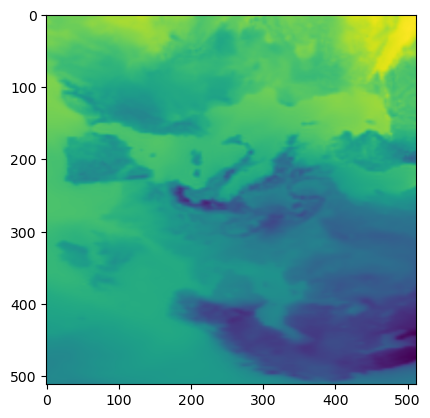

In [64]:
plt.imshow(image[0, 12]);

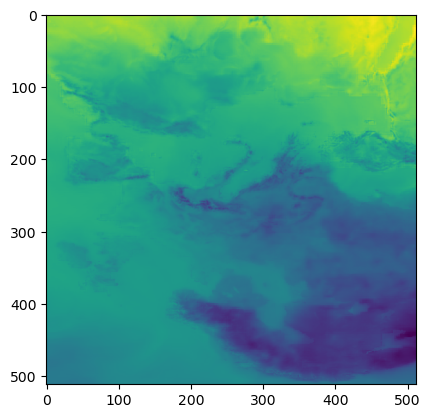

In [42]:
plt.imshow(label[0]);

In [ ]:
# Extract all data variables and drop the singleton time dimension
arrays = [image[var].values.squeeze() for var in ds.data_vars]

# Stack along channel axis
data = np.stack(arrays, axis=0)

print("Shape:", data.shape)  
# (channels, lat, lon)

<bound method Mapping.values of <xarray.Dataset> Size: 18MB
Dimensions:                        (features: 17, lat: 512, lon: 512)
Coordinates:
  * lat                            (lat) float32 2kB 20.15 20.25 ... 71.15 71.25
  * lon                            (lon) float32 2kB -11.75 -11.65 ... 39.35
    plev                           float64 8B ...
    time                           datetime64[ns] 8B ...
Dimensions without coordinates: features
Data variables:
    __xarray_dataarray_variable__  (features, lat, lon) float32 18MB ...>